In [68]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from requests import get

In [69]:
title_list = []
location_list = []
price_list = []
area_list = []

def parse_page(number):
    print(f'pracuję nad stroną nr: {number}')
    page = get(f'{url}&page={number}')
    #page = get(url)
    bs = BeautifulSoup(page.content)
    for offer in bs.find_all(attrs={'data-cy': 'l-card'}):
        footer = offer.find('p',class_='css-p6wsjo-Text eu5v0x0').get_text()
        location = footer.split()[0]
        location.replace(',','')
        #print(footer)  #- to jest cena
        price = parse_price(offer.find('p',class_='css-1q7gvpp-Text eu5v0x0').get_text())
        #price = footer.split()[0]
        title = offer.find('h6', class_='css-1pvd0aj-Text eu5v0x0').get_text()
        area = float(offer.find('div',class_= 'css-1kfqt7f').get_text().split()[0].replace(',','.'))
        title_list.append(title)
        location_list.append(location)
        price_list.append(price)
        area_list.append(area)

In [3]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/podlaskie/?search%5Bfilter_enum_rooms%5D%5B0%5D=one'

def parse_price(price):
    return float(price.replace(' ','').replace('zł','').replace('donegocjacji','').replace(',','.'))

for page in range(1,3):  #ilość stron z ogłoszeniami
    parse_page(page)

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2


In [10]:
#utworzenie data_frame'u z list z pobranymi danymi

matrix = np.matrix([title_list,location_list,price_list,area_list])

df = pd.DataFrame(data=matrix)

In [11]:
df = df.T
df = df.rename(columns={0:'title', 1:'city', 2:'price', 3:'area'})
df.head()

,title,city,price,area
0,Sprzedam mieszkanie,Szczuczyn,149000.0,27.8
1,Śliczne mieszkanie w Białymstoku bezpośrednio ...,"Białystok,",320000.0,30.0
2,Świetne mieszkanie na sprzedaż w centrum Suwałk,Suwałki,258000.0,29.3
3,Kawalerka blisko Centrum.,"Białystok,",279000.0,25.0
4,"Przytulna kawalerka, do wejścia","Białystok,",275000.0,31.5


In [96]:
df['rooms'] = 1
df.price=df.price.astype(float)
df.area=df.area.astype(float)
#dodanie kolumny z ceną za m2
df['cena m2']=df['price']/df['area'].round(2)
df.to_json("./mieszkania_OLX_1_pokoj.json")
df.sample(20)

,title,city,price,area,cena m2,rooms
0,Sprzedam mieszkanie,Szczuczyn,149000.0,27.80,5359.712230,1
19,Kawalerka 33.3m2 na osiedlu Południe - Grajewo,Grajewo,165000.0,33.00,5000.000000,1
22,Kawalerka na start ul. Warszawska,Białystok,312000.0,30.37,10273.296016,1
1,Śliczne mieszkanie w Białymstoku bezpośrednio ...,Białystok,320000.0,30.00,10666.666667,1
17,Mieszkanie na sprzedaż Wasilków,Wasilków,185000.0,24.34,7600.657354,1
16,"Mieszkanie 34,59m2 ; ul. Wilsona TYLKO 186 900 zł",Zambrów,186900.0,34.59,5403.295750,1
18,"Mieszkanie po generalnym remoncie,umeblowane.3...",Białystok,255000.0,30.00,8500.000000,1
5,Kawalerka - drugie piętro - Okazja - Niski Czynsz,Wasilków,152000.0,24.00,6333.333333,1
6,"Kawalerka 30 mkw, VI p do Wejścia",Białystok,259000.0,30.00,8633.333333,1
20,"Kawalerka os. Tysiąclecia 22,3 m2-dobra cena",Białystok,220000.0,22.30,9865.470852,1


## Analiza danych ##

In [89]:
df = pd.read_json("./mieszkania_OLX_1_pokoj.json")
#df = df.rename(columns={0:'title', 1:'city', 2:'price', 3:'area'})

df.sample().T

,17
title,Mieszkanie na sprzedaż Wasilków
city,Wasilków
price,185000
area,24.34
cena m2,7600.657354
rooms,1


In [14]:
#kategoryzacja danych
df["city"].unique()

array(['Szczuczyn', 'Białystok,', 'Suwałki', 'Wasilków', 'Białystok',
       'Czarna', 'Łapy', 'Goniądz', 'Zambrów', 'Grajewo', 'Bielsk'],
      dtype=object)

In [71]:
czarna = df["city"] == "Czarna"
df.loc[czarna, "city"] = "Czarna Białostocka"

df.loc[df['city'] == "Białystok,", 'city'] = "Białystok"
df.loc[df['city'] == "Bielsk", 'city'] = "Bielsk Podlaski"

df["city"].unique()

array(['Szczuczyn', 'Białystok', 'Suwałki', 'Wasilków',
       'Czarna Białostocka', 'Łapy', 'Goniądz', 'Zambrów', 'Grajewo',
       'Bielsk Podlaski'], dtype=object)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   25 non-null     object 
 1   city    25 non-null     object 
 2   price   25 non-null     int64  
 3   area    25 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


Analiza danych

In [73]:
import matplotlib.pyplot as plt

,title,city,price,area,cena m2,rooms
16,"Mieszkanie 34,59m2 ; ul. Wilsona TYLKO 186 900 zł",Zambrów,186900,34.59,5403.295750,1
7,"Kawalerka, Ul. Knyszyńska",Białystok,395000,34.50,11449.275362,1
19,Kawalerka 33.3m2 na osiedlu Południe - Grajewo,Grajewo,165000,33.00,5000.000000,1
9,Świetna Kawalerka w Centrum!,Białystok,259000,29.20,8869.863014,1
8,"Przytulne 46,30m2 w Apartamentach Generalskich",Białystok,430000,46.30,9287.257019,1
6,"Kawalerka 30 mkw, VI p do Wejścia",Białystok,259000,30.00,8633.333333,1
10,Bezpośrednio! Okazja! Pilnie! Centrum! Ul.Ciepła,Białystok,199999,26.60,7518.759398,1
3,Kawalerka blisko Centrum.,Białystok,279000,25.00,11160.000000,1
15,"Mieszkanie 34m2, parter",Goniądz,145000,34.00,4264.705882,1
21,Mieszkanie do wprowadzenia,Białystok,280000,26.00,10769.230769,1


In [91]:
df.describe()

,price,area,cena m2,rooms
count,25.000000,25.000000,25.000000,25.0
mean,237195.960000,29.298800,8119.896036,1.0
std,75320.460919,5.081039,2119.072193,0.0
min,141000.000000,22.300000,4264.705882,1.0
25%,185000.000000,25.000000,6000.000000,1.0
50%,249000.000000,29.200000,8633.333333,1.0
75%,275000.000000,31.500000,9749.412686,1.0
max,430000.000000,46.300000,11449.275362,1.0


In [92]:
#wyświetlić dane najtańszego mieszkania
temp = df.sort_values('price')
temp.head(10)

,title,city,price,area,cena m2,rooms
11,Niska Cena - Kawalerka z dużym Potencjałem,Czarna Białostocka,141000,25.00,5640.000000,1
15,"Mieszkanie 34m2, parter",Goniądz,145000,34.00,4264.705882,1
0,Sprzedam mieszkanie,Szczuczyn,149000,27.80,5359.712230,1
24,Mieszkanie na sprzedaż,Bielsk Podlaski,150000,25.00,6000.000000,1
5,Kawalerka - drugie piętro - Okazja - Niski Czynsz,Wasilków,152000,24.00,6333.333333,1
19,Kawalerka 33.3m2 na osiedlu Południe - Grajewo,Grajewo,165000,33.00,5000.000000,1
17,Mieszkanie na sprzedaż Wasilków,Wasilków,185000,24.34,7600.657354,1
16,"Mieszkanie 34,59m2 ; ul. Wilsona TYLKO 186 900 zł",Zambrów,186900,34.59,5403.295750,1
14,"Rezerwacja oferty!!! Łapy, kawalerka, 34 mkw",Łapy,195000,34.00,5735.294118,1
10,Bezpośrednio! Okazja! Pilnie! Centrum! Ul.Ciepła,Białystok,199999,26.60,7518.759398,1


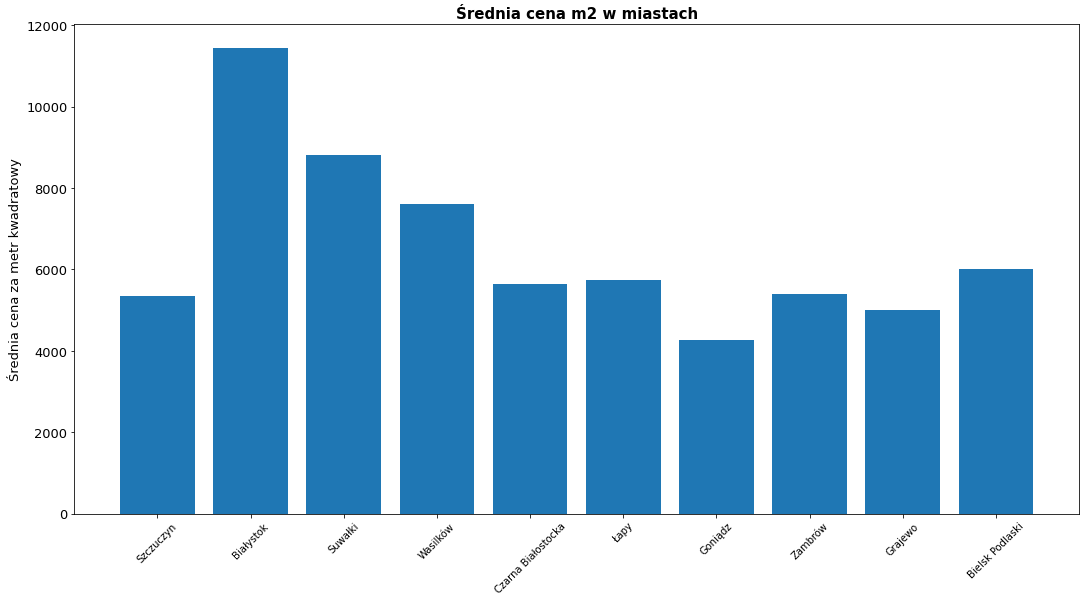

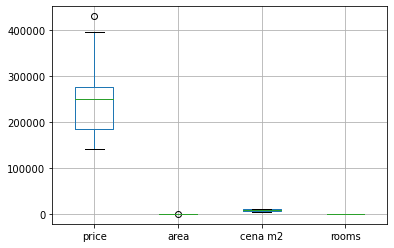

In [93]:
plt.figure(figsize=(18,9))
x = df.city  # wartości na osi x
y = df["cena m2"]  # wartości na osi y
plt.xticks(rotation = 45)
plt.yticks(fontsize = 13)
plt.ylabel('Średnia cena za metr kwadratowy', fontsize = 13)
plt.title('Średnia cena m2 w miastach', fontsize=15, fontweight='bold')
plt.bar(x, y)
plt.figure()


bp = df.boxplot()

#df.plot.barh(stacked=True);

In [52]:
###Ogłoszenia w poszczególnych miastach###

<AxesSubplot:xlabel='city'>

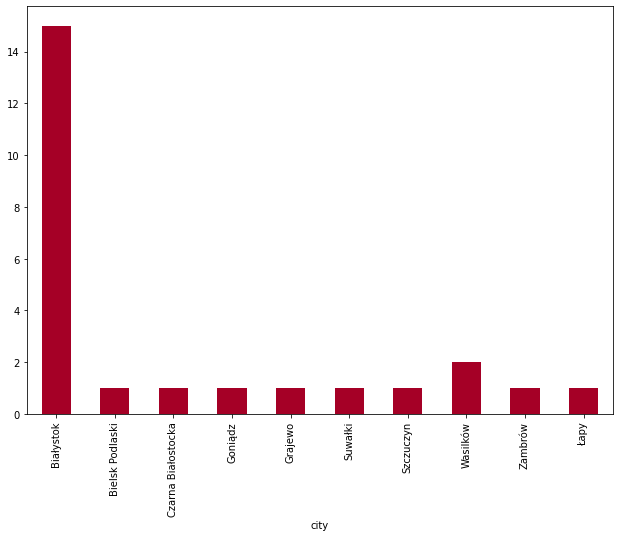

In [78]:
df.groupby("city") \
    .count()["title"] \
    .plot.bar(figsize=(10.5, 7.5), cmap="RdYlGn")

<AxesSubplot:ylabel='city'>

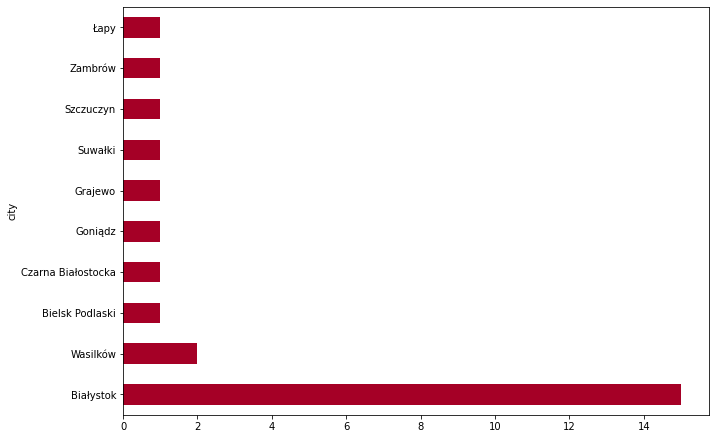

In [54]:
#ilość ogłoszeń dla poszczególnych miast
df.groupby("city") \
    .count()["title"] \
    .sort_values(ascending=False) \
    .head(n=15) \
    .plot.barh(figsize=(10.5, 7.5), cmap="RdYlGn")

<AxesSubplot:>

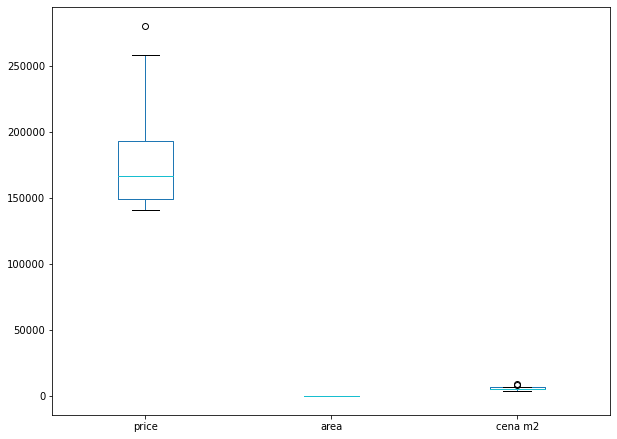

In [79]:
df.groupby("city") \
    .mean() \
    .plot.box(cmap="tab10", 
               figsize=(10.0, 7.5))

In [84]:
#grupowanie według wybranej kolumny, wykonanie funkcji agregujących na tej grupie dla pola cena m2
def analyse_column(column_name):
    result = df.groupby(by=[column_name])["cena m2"].agg([
            "mean",  # określenie średniej
            "count",  # określenie liczebności grupy
        ]).sort_values(["mean"], ascending=False)
    result.columns = [
        "Średnia",
        "Liczba"
    ]
    #result = result.loc[result['Liczba'] > 4] #wybieramy miasta, gdzie były więcej niż 4 ogłoszenia
    return result

def visualize_analysis(df, compare_value):
    plt.figure(figsize=(21,9))  # określenie wymiaru figury (w calach)

    x = df.index.astype(str)  # wartości na osi x
    y = df["Średnia"]  # wartości na osi y

    plt.bar(x, y)  # określenie typu wykresu, jaki chemy wykreślić – tutaj słupkowy

    # stylowanie wykresu
    plt.xlabel("Miasto")  # dodanie legendy dla osi x
    plt.ylabel("Średnia cena m2")  # dodanie legendy dla osi y
    plt.title("Średnia cena metra kw w miastach")  # nadanie tytułu dla wykresu

    # dodamy również linię poziomą, do której będziemy mogli odnosić poszczególne grupy
    plt.axhline(compare_value, color="red", linestyle="--")

    plt.show()

In [85]:
city_analysis = analyse_column("city")
city_analysis

,Średnia,Liczba
city,,
Białystok,9523.662766,15
Suwałki,8805.460751,1
Wasilków,6966.995344,2
Bielsk Podlaski,6000.000000,1
Łapy,5735.294118,1
Czarna Białostocka,5640.000000,1
Zambrów,5403.295750,1
Szczuczyn,5359.712230,1
Grajewo,5000.000000,1


In [82]:
global_mean = df["cena m2"].mean()  # określenie globalnej ceny za m2 (średniej)
global_mean

8119.896036438227

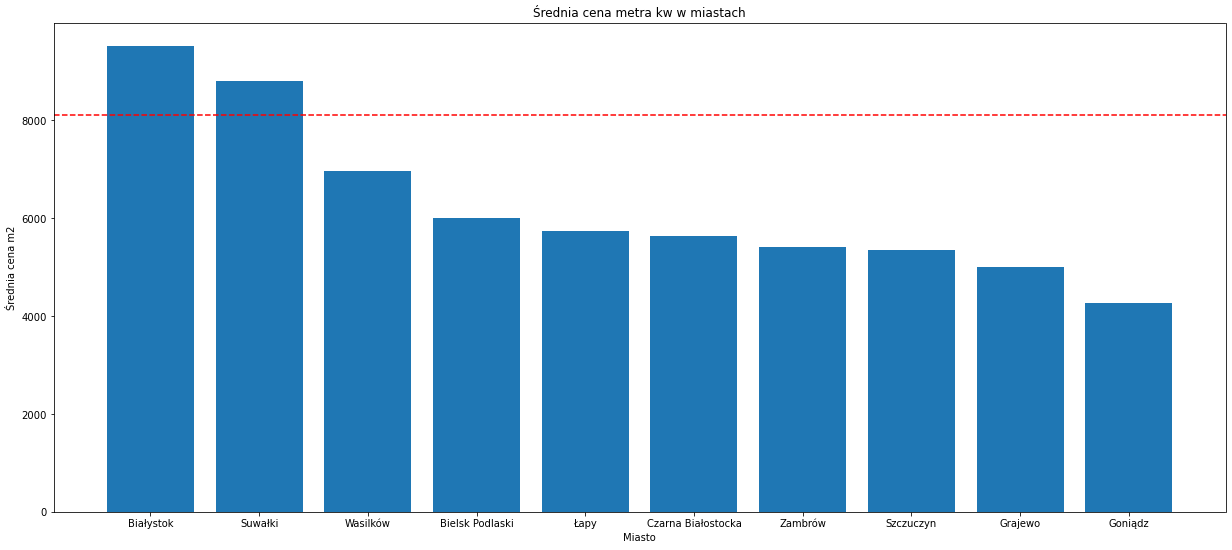

In [86]:
visualize_analysis(city_analysis, global_mean)